# Machine Learning - Assignment Group B


## Dataset 1 (opel_corsa_01)

### Tasks of Assignement - Purpose of this notebook! 
- Import dataset into environment and prepare for Machine Learning (ML) tasks
- Replace text in columns(roadSurface,traffic,drivingStyle, with 0,1,2) etc
- Using Matplotlib/seaborn plot data to find useful features for classification
- Split the data to make training data and test data
- run Logistic Classification model
- assess accuracy/usefulness meaure of Logistic Classification model
- run SVM Classigication model
- assess accuracy/usefulness measure of SVM Classification model
- Compare Logistic vs SVM
- run KNN Classification Model
- assess accuracy/usefulness measure of KNN
- tweak params of KNN to find best fit for model prediction
- Load new data set and perform modelling/classification on entire set

**Import 2000 rows from the dataset - prepare dataset for ML**

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
#opel_corsa01_LGa file_path = '../input/opel_corsa_01_LGa.csv' and read in =1000
opel_corsa_01LGa = ('C:\\Users\\Liam\\opel_corsa_01_LGa.csv')
# read in 2000 rows and store data in DataFrame titled opel_corsa01_data
opel_corsa01_data = pd.read_csv(opel_corsa_01LGa, nrows=2000)
# print a summary of the data in opel_corsa_01_LGa
opel_corsa01_data.describe()



,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.518750,34.016027,34.893803,254.286585,-0.024545,0.104954,25.597451,76.046000,114.085500,1589.462000,15.651585,15.705000,0.017559,14.276382
std,1.381785,27.002933,21.735958,228.936482,2.424312,0.837798,18.494801,8.341863,17.398148,531.110969,8.223197,3.420208,0.380340,3.618816
min,-6.400024,0.000000,3.910626,4.866906,-14.636705,-2.380000,0.000000,44.000000,98.000000,763.000000,4.340000,8.000000,-1.163900,7.593099
25%,-1.299988,11.709359,20.681844,88.552782,-1.125899,-0.506000,13.725491,75.000000,103.000000,1037.500000,8.667500,13.000000,-0.257800,11.955765
50%,-0.399963,30.624477,29.320312,184.133523,0.000000,0.162050,25.098040,79.000000,108.000000,1707.500000,14.910000,16.000000,0.011700,13.912476
75%,0.200012,53.142479,43.941999,328.195525,1.125900,0.746000,34.117649,81.000000,118.000000,2034.000000,20.120001,18.000000,0.250975,15.808550
max,4.400024,117.093597,116.601954,1051.387117,10.358280,2.330000,100.000000,84.000000,252.000000,2929.000000,66.230003,31.000000,1.210000,25.666862


In [15]:
df = opel_corsa01_data
#print out first 5 rows of data set
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,EvenPaceStyle


**replace text values in target columns**
- target columns = drivingStyle and roadSurface


In [16]:
df['drivingStyle'] = df.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df['roadSurface']= df.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [17]:
df.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,0,0
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,0,0
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,0,0
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,0,0
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,0,0


to confirm the shape of the datafield df can run shape

In [18]:
df.shape

(2000, 16)

In df we have 16 columns and 2000 rows, columns 1-14 are our features, and columns 15 and 16 are goping to be our responce. Looking at a few of the columns using pairplot function - to check if any columns are lineraly related - but little evidence seen in various plots to indicate any linearity between columns (see pairplot below). Correlation Matrix and Scatter Plots provide better criterea for selecting features to predict one of the two responses.

Continuing with this example it was chosen to predict a responce for 'drivingStyle'. From the data shown in the bar graphs - 'drivingStyle' has more intances for 0 and 1 in the 1-2000 data points

Before maikng any classification models - we can plot the data using seaborn and matplotlib - useful for statisical data visualisation


c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


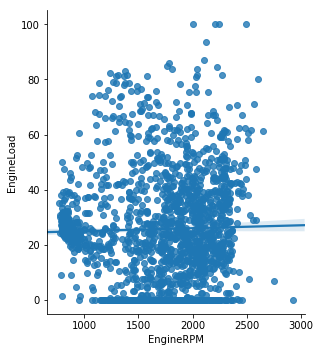

In [30]:
import seaborn as sns
%matplotlib inline 
sns.pairplot(df, x_vars=['EngineRPM' ],y_vars='EngineLoad', size=5,aspect=0.9, kind='reg')

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os 

In [70]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 3 and nunique[col] < 2000]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 0.7, w_pad = 0.5, h_pad = 0.5)
    plt.show()

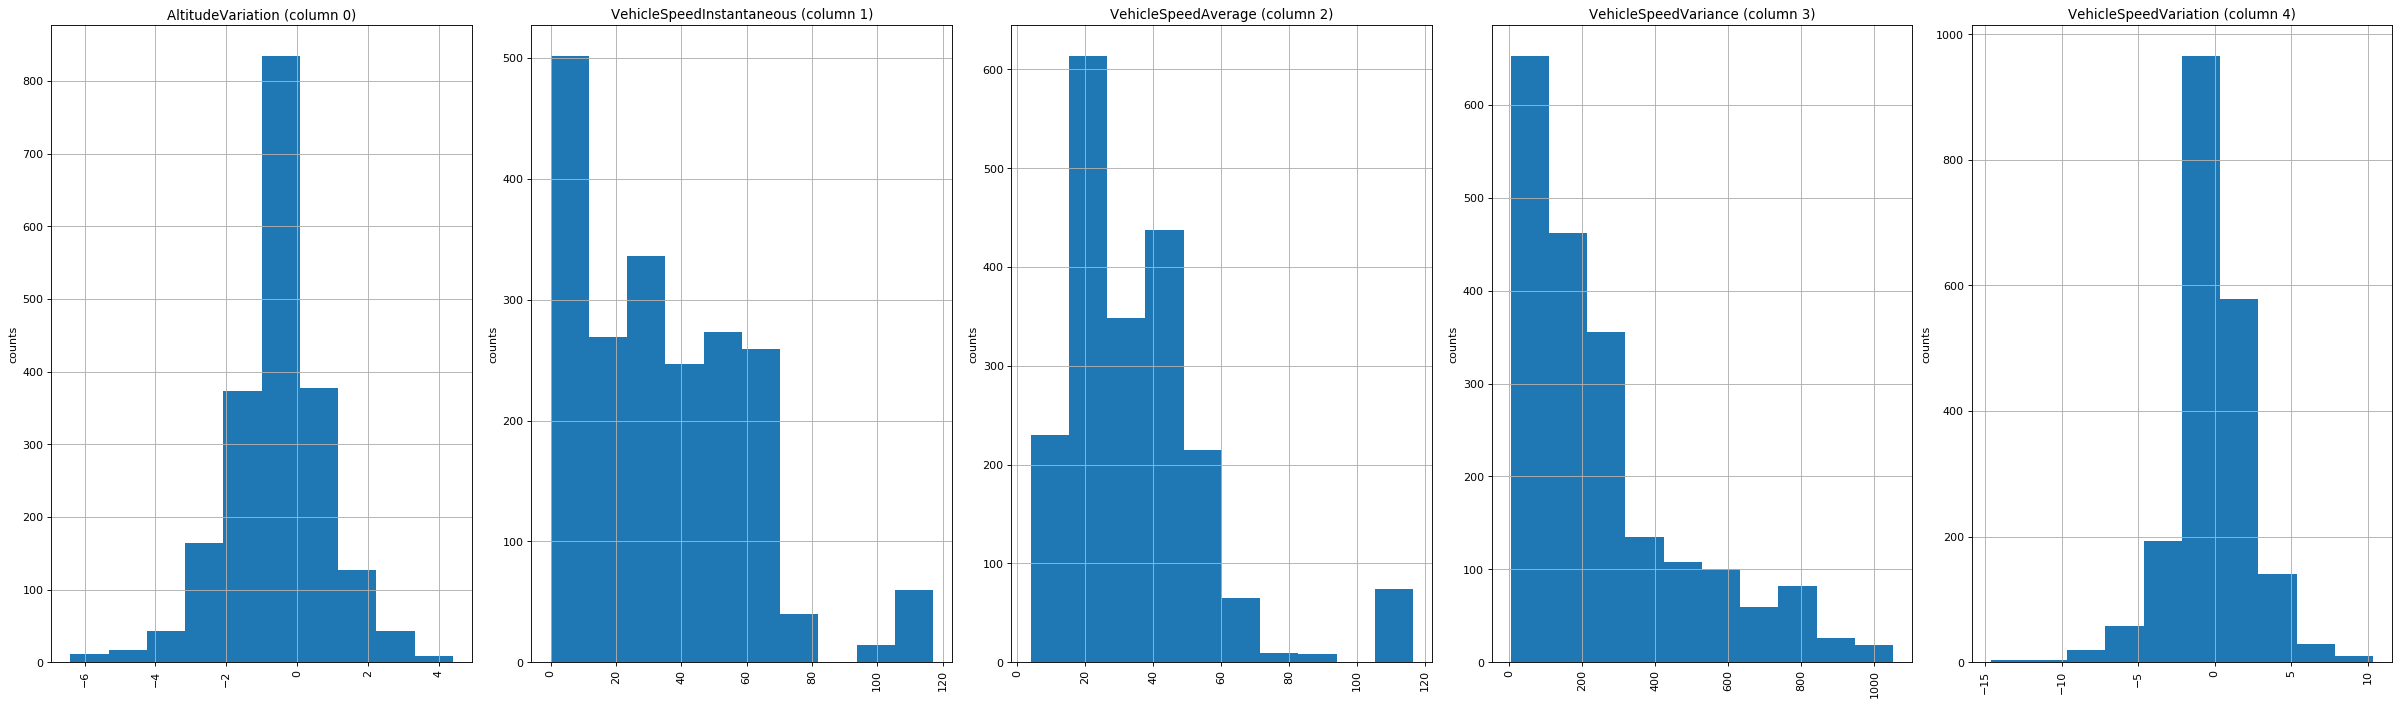

In [71]:
plotPerColumnDistribution(df, 5, 6)

In [89]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 4]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 0.7, w_pad = 0.5, h_pad = 0.5)
    plt.show()

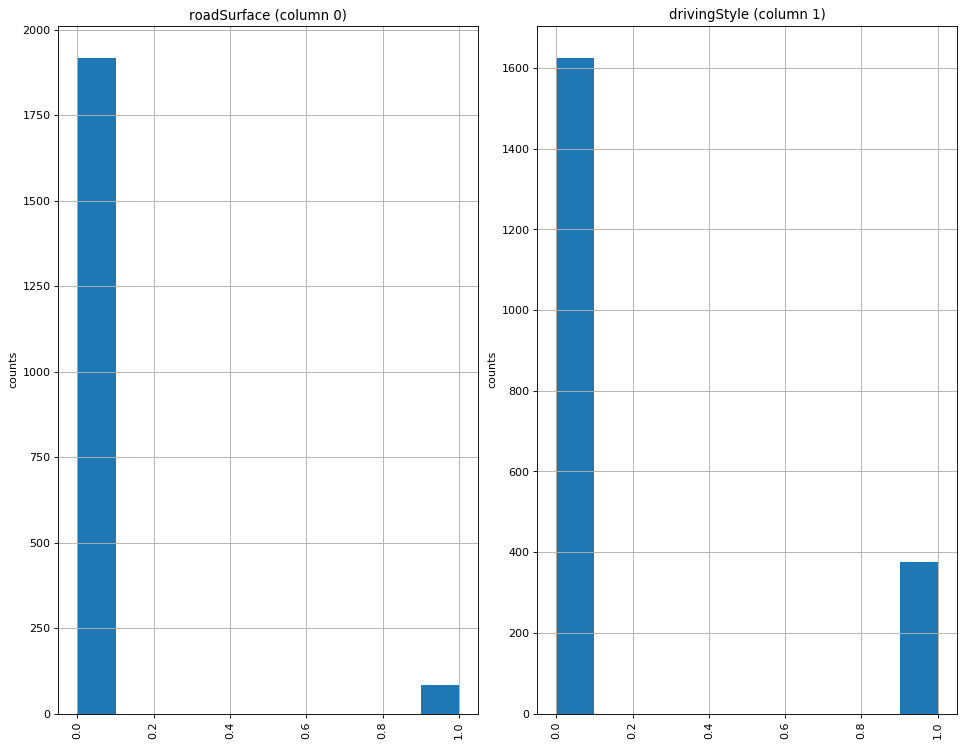

In [90]:
plotPerColumnDistribution(df, 5, 6)

In [79]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for opel_corsa_01', fontsize=15)
    plt.show()

In [91]:
# Scatter and density plots for first 7 Columns
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:7]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [95]:
# Scatter and density plots for Columns 8-14
def plotScatterMatrix8_14(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    #df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[7:14]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

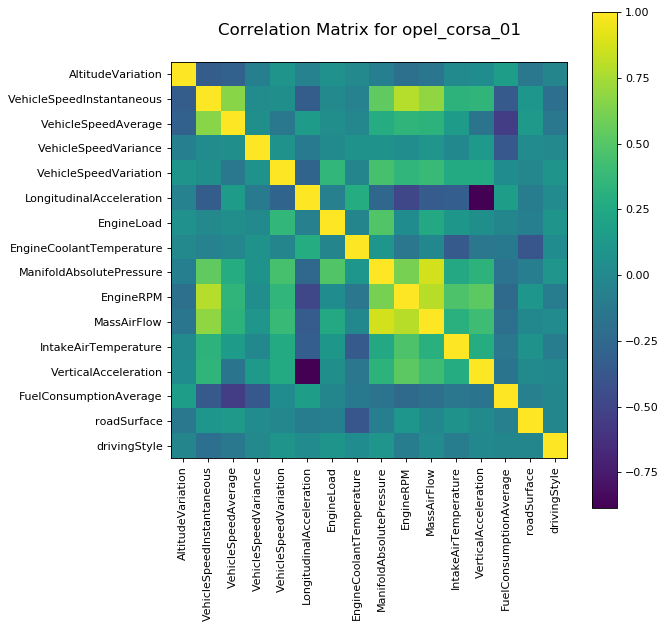

In [87]:
plotCorrelationMatrix(df, 8)

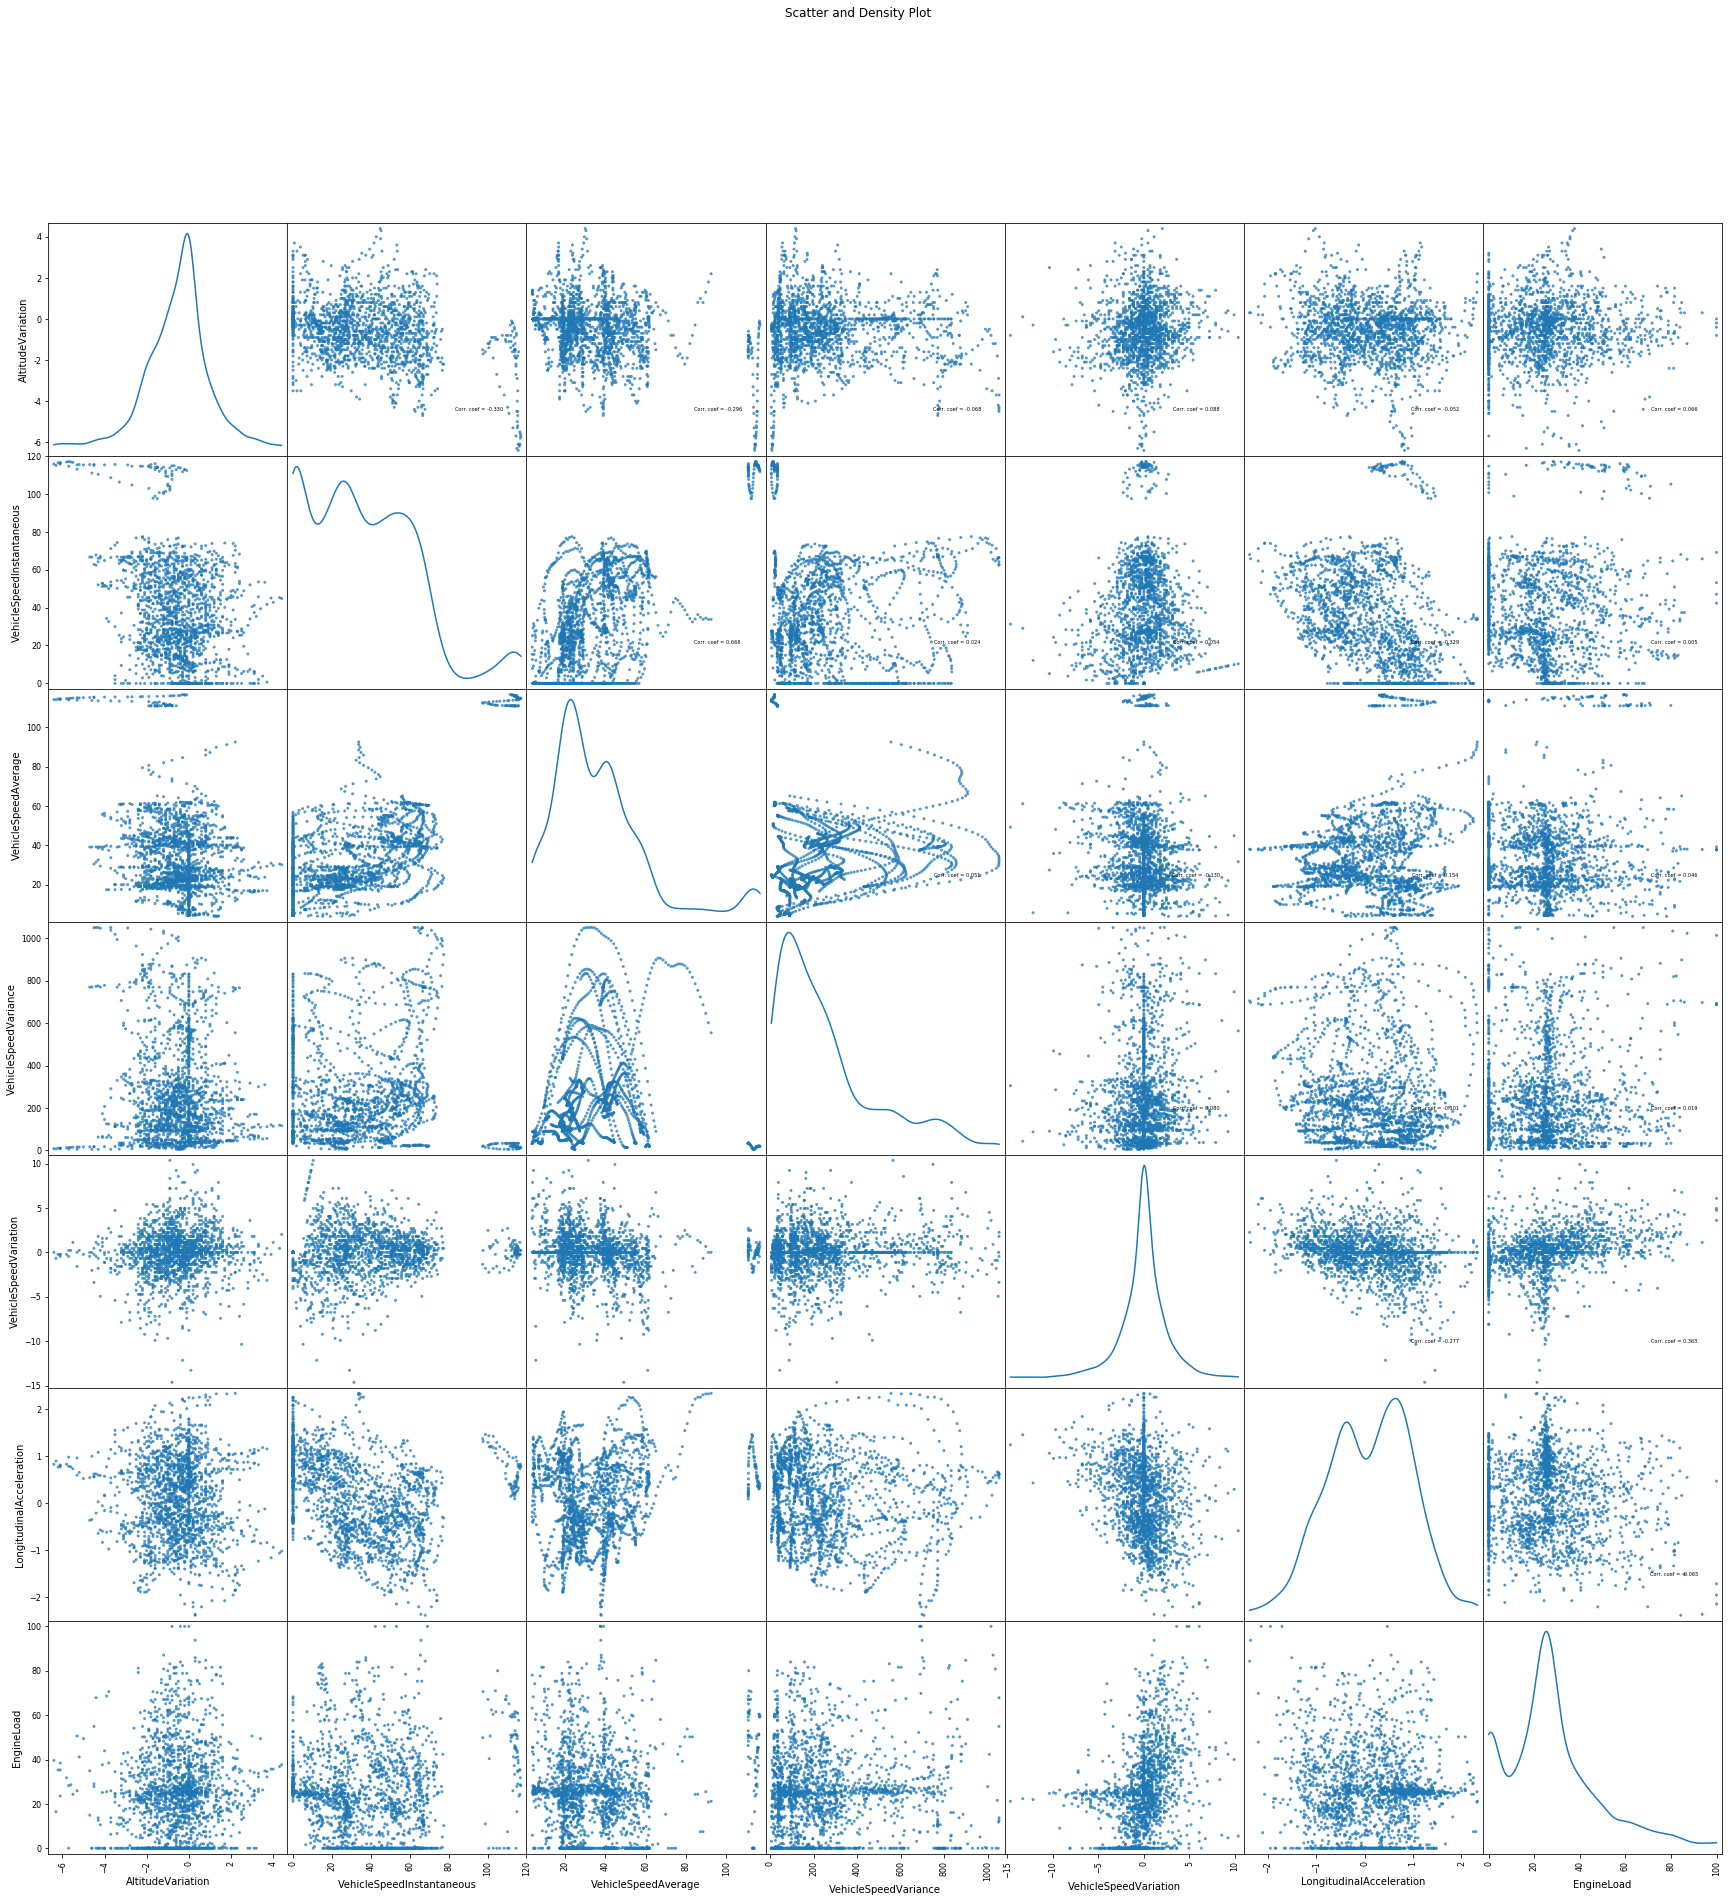

In [94]:
plotScatterMatrix(df, 30, 5)

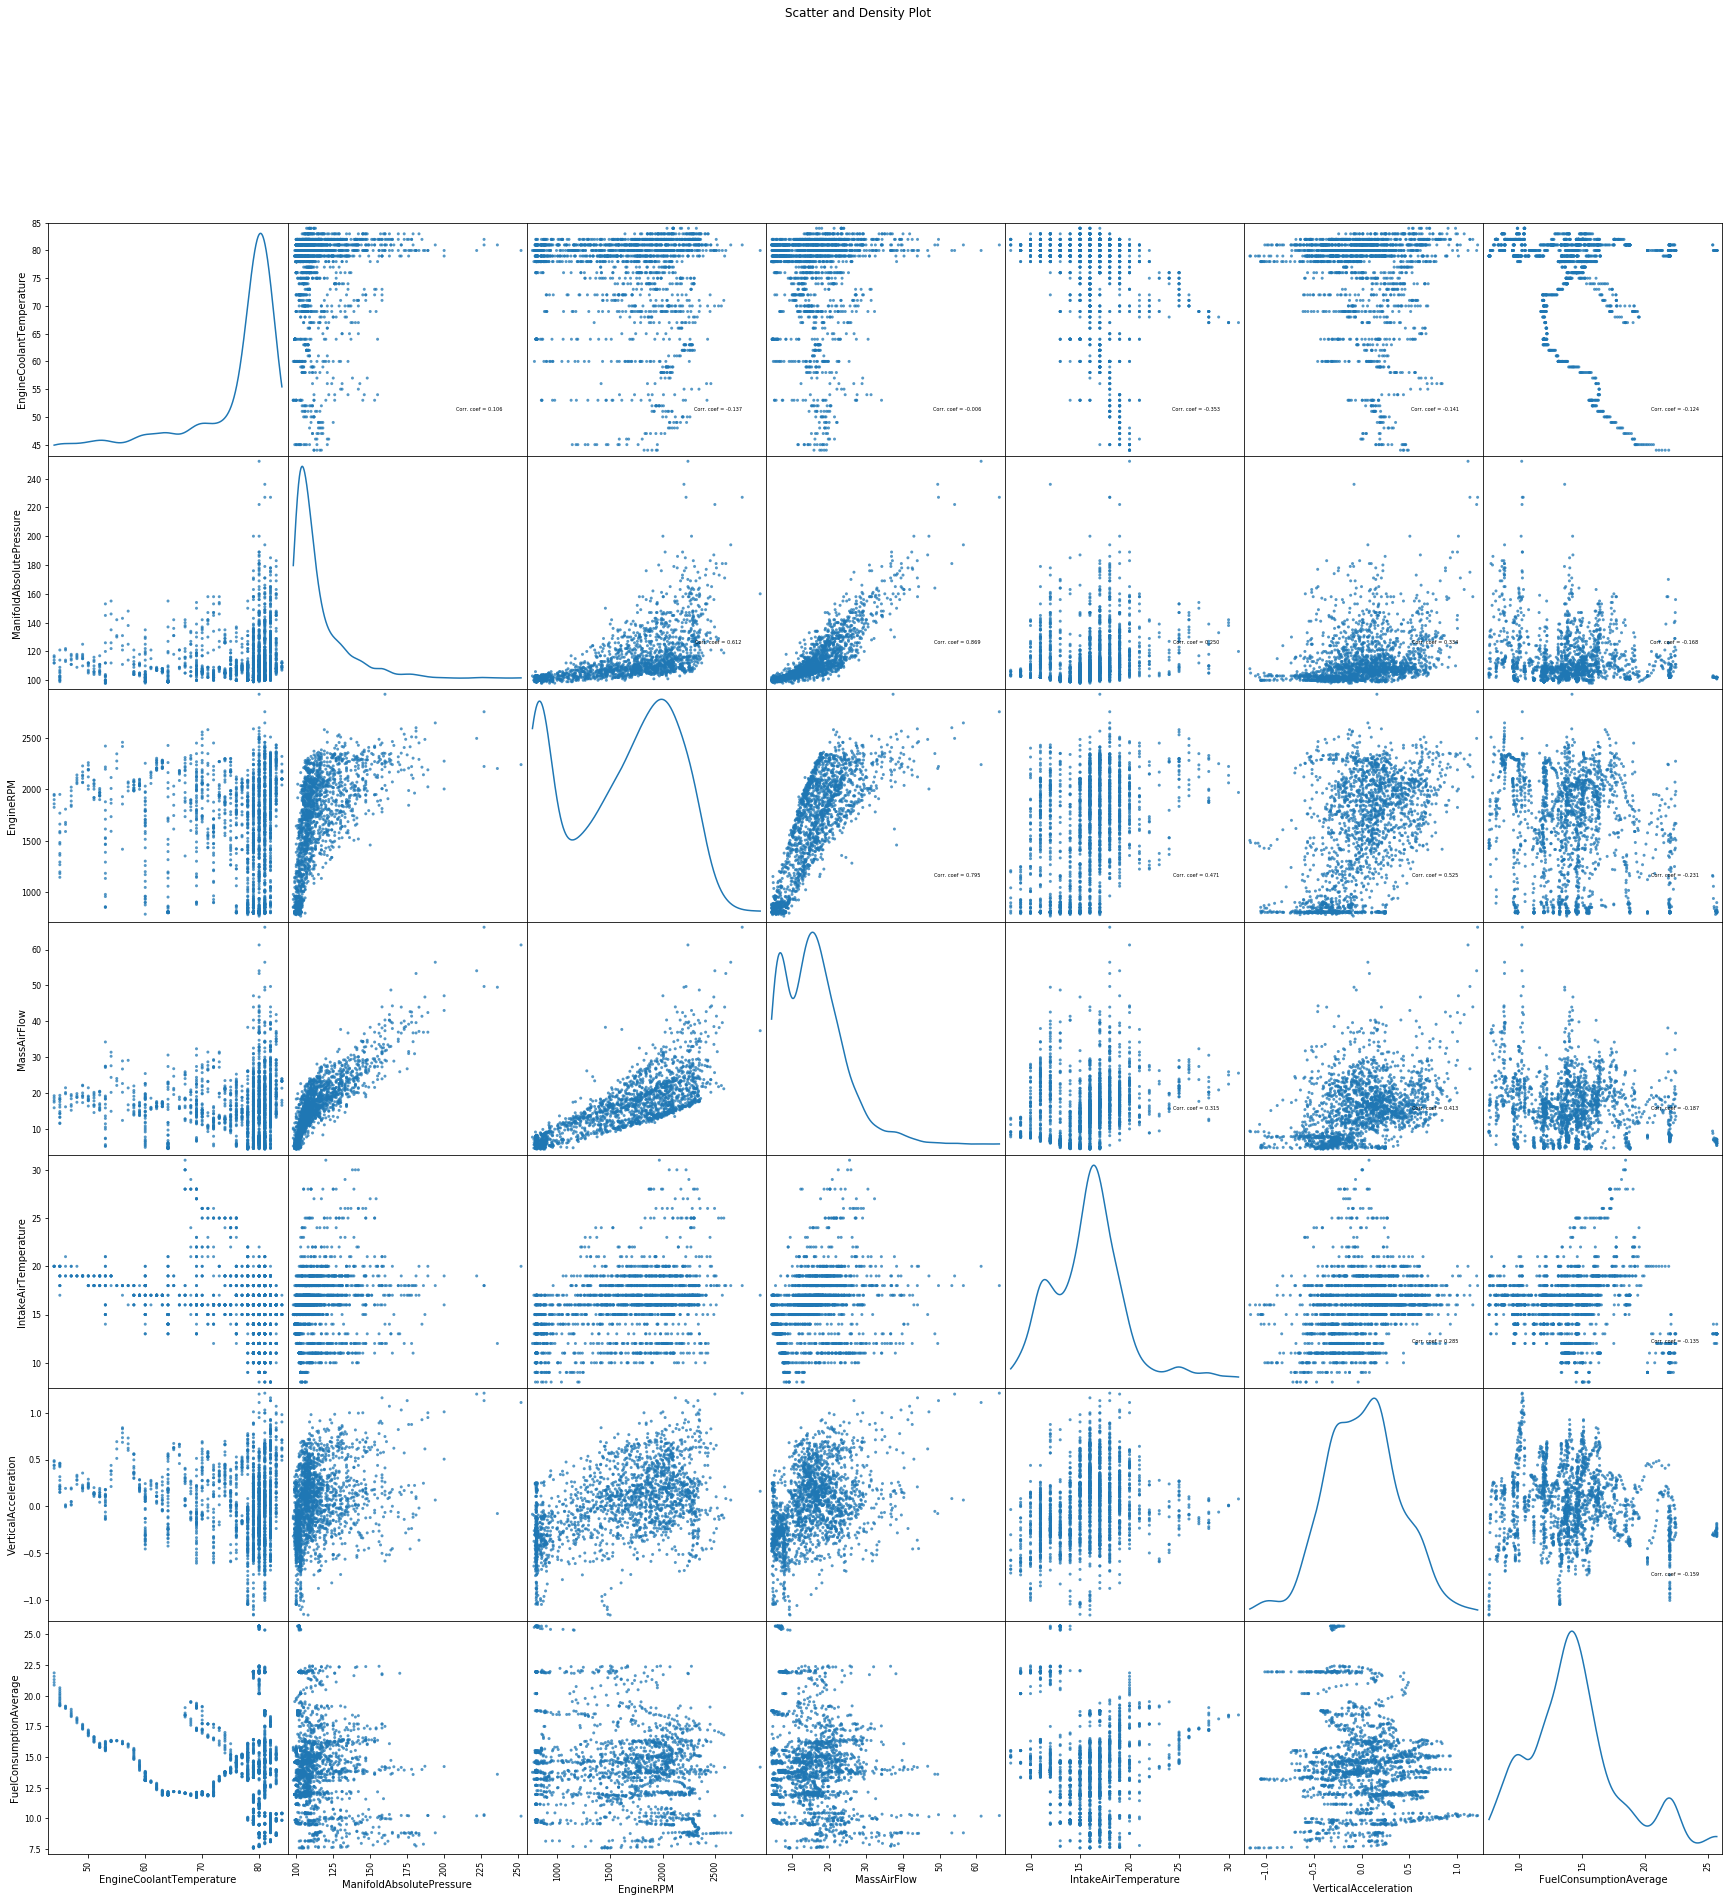

In [96]:
plotScatterMatrix8_14(df, 30, 5)

**Performing Linear Regression to predict 'drivingStyle'**

- Need to choose X values or features from the columns 1-14 to input into the classification model
- Responce or y value (drivingStyle) will be the output or prediction


from the correlation matrix - decided to choose columns 

In [100]:
list(df.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [101]:
features = ['VehicleSpeedInstantaneous','VehicleSpeedAverage','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','VerticalAcceleration','LongitudinalAcceleration','AltitudeVariation','VehicleSpeedVariance','VehicleSpeedVariation']

In [102]:
X = df[features]

In [103]:
X.head()

,VehicleSpeedInstantaneous,VehicleSpeedAverage,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,VerticalAcceleration,LongitudinalAcceleration,AltitudeVariation,VehicleSpeedVariance,VehicleSpeedVariation
0,25.670519,13.223501,106,1796,15.81,-0.1133,0.3555,-2.299988,121.592690,-2.476980
1,24.094259,13.638919,103,1689,14.65,-0.1289,0.4492,-2.099976,120.422571,-1.576260
2,22.743179,14.031043,103,1599,11.85,-0.1328,0.4258,-1.500000,118.456769,-1.351080
3,22.292820,14.171073,104,1620,12.21,-0.0859,0.4140,0.100037,117.571308,-0.450359
4,23.643900,14.328954,104,1708,11.91,-0.0664,0.3945,0.099976,117.074149,1.351080


In [105]:
print(X.shape)

(2000, 10)


In [106]:
y = df['drivingStyle']

In [107]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In order to train a model need to make a trainin and test split of the data

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 10)
(500, 10)
(1500,)
(500,)


In [128]:
from sklearn.linear_model import LinearRegression, LogisticRegression
linReg = LinearRegression()
linReg.fit(X_train,y_train)
y_pred = linReg.predict(X_test)


In [123]:
print(linReg.intercept_)
print(linReg.coef_)

-0.4457588605749542
[-9.30961080e-03  2.58095398e-03  5.86963155e-03  7.34727616e-05
  3.94717178e-03  4.32990083e-02 -2.10150297e-02 -4.04468495e-02
 -3.59789131e-05 -1.11596356e-02]


**the values above are the intercept and coef's calcualted from the training data - this values will be used in the prediction**
some values for the coef's produce a -value, perhaps having a negative influence in predicting drivingStyle 

In [116]:
from sklearn import metrics


In [125]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.2739940777687645
Root Mean Squared Error:  0.36645148959515983


**Performing Logistic Regression to predict 'drivingStyle'**

In [129]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)



c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_pred = logreg.predict(X_test)

In [133]:
print("Compare actual resaponce with predicted: ", metrics.accuracy_score(y_test, y_pred))

Compare actual resaponce with predicted:  0.81


**Increasing the number of rows and performing Logistical regression on the Larger dataset to determine
if the training accuracy improves** 

In [134]:
opel_corsa01_data = pd.read_csv(opel_corsa_01LGa, nrows=7000)
# print a summary of the data in opel_corsa_01_LGa
opel_corsa01_data.describe()
df1 = opel_corsa01_data
df1['drivingStyle'] = df1.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1})
df1['roadSurface']= df1.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1})

In [139]:
list(df1.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurface',
 'drivingStyle']

In [140]:
features1 = ['VehicleSpeedInstantaneous','VehicleSpeedAverage','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','VerticalAcceleration','LongitudinalAcceleration','AltitudeVariation','VehicleSpeedVariance','VehicleSpeedVariation']

In [141]:
X1= df1[features1]
y1 = df1['drivingStyle']

In [143]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 1)

In [144]:
logreg1 = LogisticRegression()
logreg1.fit(X1_train,y1_train)

c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
y1_pred = logreg1.predict(X1_test)

In [146]:
print("Compare actual resaponce with predicted: ", metrics.accuracy_score(y1_test, y1_pred))

Compare actual resaponce with predicted:  0.8217142857142857


We only see a marginal increase in model efficeincy when increasing the number of rows in the training set

**Performing KNN with k=5 to predict 'drivingStyle'**

In [148]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_train, y1_train)
y2_pred = knn.predict(X1_test)

In [150]:
print(metrics.accuracy_score(y1_test, y2_pred))

0.8228571428571428


We only see a marginal increase in performance when using KNN and k=5

**Performing KNN with k=15 to predict 'drivingStyle'**

In [151]:
knn1 = KNeighborsClassifier(n_neighbors = 15)
knn1.fit(X1_train, y1_train)
y3_pred = knn1.predict(X1_test)

In [152]:
print(metrics.accuracy_score(y1_test, y3_pred))

0.8234285714285714


We see a slightly better rate of predicting response with K=15

**Performing KNN with k=20 to predict 'drivingStyle'**

In [153]:
knn2 = KNeighborsClassifier(n_neighbors = 20)
knn2.fit(X1_train, y1_train)
y4_pred = knn2.predict(X1_test)

In [154]:
print(metrics.accuracy_score(y1_test, y4_pred))

0.8337142857142857


**Performing KNN with k=30 to predict 'drivingStyle'**

In [155]:
knn3 = KNeighborsClassifier(n_neighbors = 30)
knn3.fit(X1_train, y1_train)
y5_pred = knn3.predict(X1_test)

In [156]:
print(metrics.accuracy_score(y1_test, y5_pred))

0.8291428571428572


**Performing SVM with kernel = rfb to predict 'drivingStyle'**

In [157]:
from sklearn import svm

In [160]:
modelsvm = svm.SVC(kernel ='rbf')

In [161]:
modelsvm.fit(X1_train, y1_train)

c:\users\liam\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [165]:
y6_pred = modelsvm.predict(X1_test)

In [166]:
print(metrics.accuracy_score(y1_test, y6_pred))

0.8274285714285714


**Performing SVM with kernel = linear to predict 'drivingStyle'**

In [167]:
modelsvm1 = svm.SVC(kernel ='linear')

In [168]:
modelsvm1.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [169]:
y7_pred = modelsvm1.predict(X1_test)

In [170]:
print(metrics.accuracy_score(y1_test, y7_pred))

0.8257142857142857
